In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte

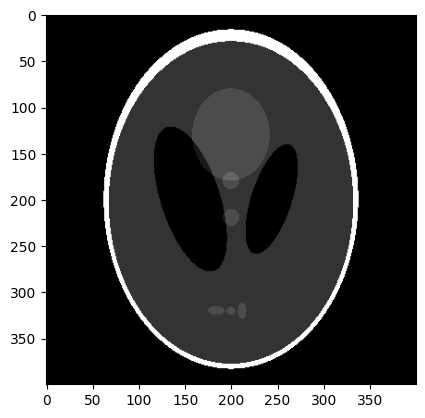

In [ ]:
orig_phantom = img_as_ubyte(data.shepp_logan_phantom())
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

In [ ]:
#define a convenience function for plotting comparisons:

def plot_comparison(original, filtered, filter_name):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray), ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray), ax2.set_title(filter_name)
  ax2.axis('off')

In [ ]:
#define a convenience function for plotting comparisons:

def plot_comparison(original, filtered, filter_name):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original'),ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(filter_name),ax2.axis('off')

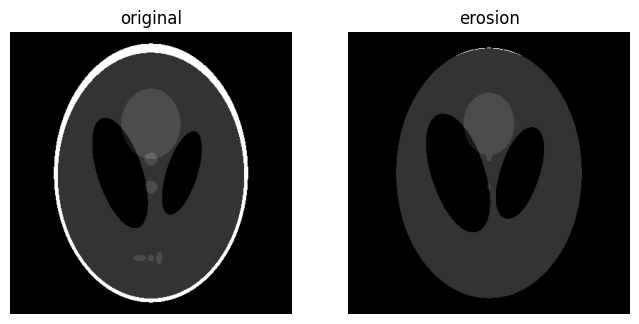

In [ ]:
#disk command is used for circular structuring element

from skimage.morphology import (erosion, dilation, opening, closing, white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

footprint = disk(6)
eroded = erosion(orig_phantom, footprint)
plot_comparison(orig_phantom, eroded, 'erosion')

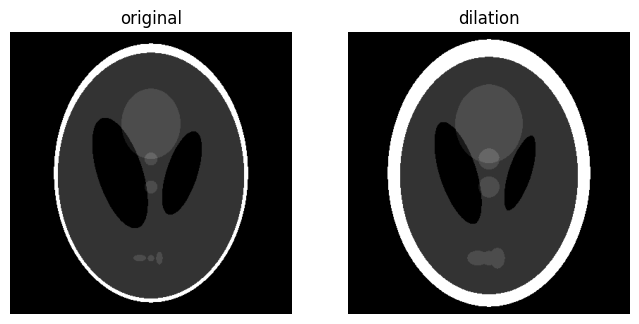

In [ ]:
#dialtion -
dilated = dilation(orig_phantom, footprint)
plot_comparison(orig_phantom, dilated, 'dilation')

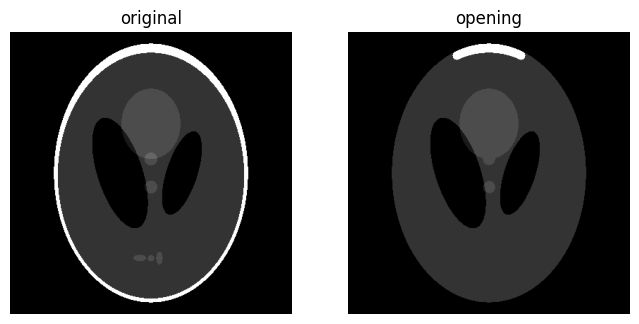

In [ ]:
#opening - removes small objects from the foreground
opened = opening(orig_phantom,footprint)
plot_comparison(orig_phantom, opened,'opening')

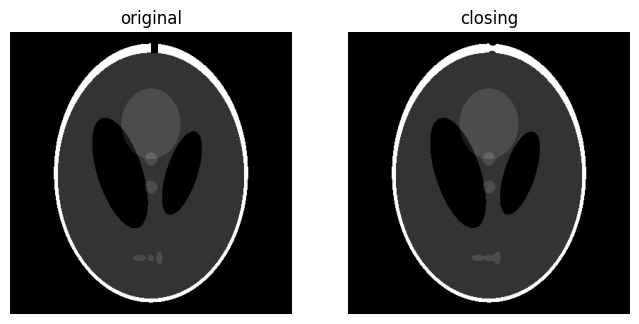

In [ ]:
#closing - to smoother the contour of the distorted

phantom = orig_phantom.copy()
phantom[10:30, 200:210] = 0
closed = closing(phantom, footprint)
plot_comparison(phantom, closed,'closing')

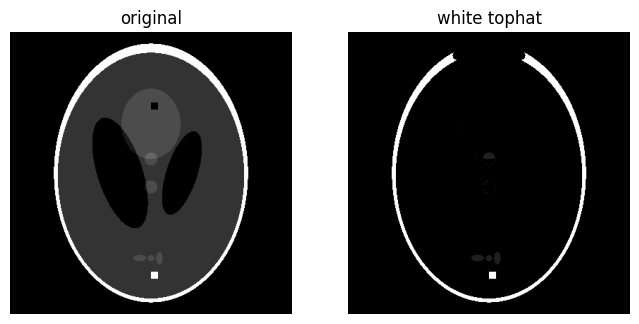

In [ ]:
#white_tophat
phantom = orig_phantom.copy()
phantom[340:350, 200:210] = 255
phantom[100:110, 200:210] = 0
w_tophat = white_tophat(phantom, footprint)
plot_comparison(phantom, w_tophat, 'white tophat')

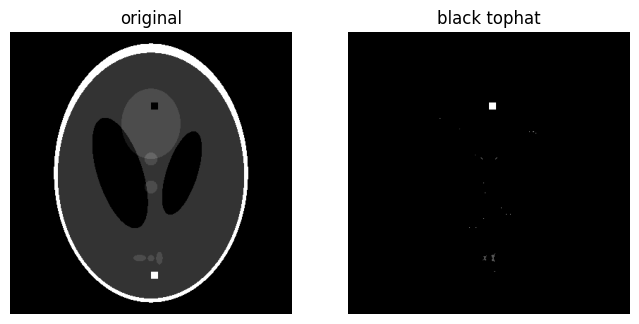

In [ ]:
#black_tophat
b_tophat = black_tophat(phantom, footprint)
plot_comparison(phantom, b_tophat, 'black tophat')